### 도수분포표

* 단순한 숫자의 나열인 데이터 자체로는 어떠한 정보도 알 수 없음
* 80명의 학생의 키를 정리한 데이터에서 무엇을 알수 있을까?
* 각 학생들의 키는 모두 같지않고 제각각의 숫자로 나타남 
    + 다양한 수치로 나타나는 것을 분포한다라고 함
* 분포가 생기는 이유는 어떤 불확실성(!)이 있기 때문
* 이러한 불확실성이 제각각인 키의 수치를 발생시킨다고 여김
* 하지만, 이러한 수치들에도 고유한 특징이나 반복(패턴)되는 것이 존재
* 분포의 특성을 도출하기 위해 (확률에 근거한)통계라는 도구 사용


### 80명 학생들의 키

In [1]:
heights = read.csv('height.csv')

In [2]:
str(heights)

'data.frame':	80 obs. of  1 variable:
 $ height: int  151 154 160 160 163 156 158 156 154 160 ...


In [3]:
summary(heights)

     height     
 Min.   :143.0  
 1st Qu.:154.0  
 Median :157.5  
 Mean   :157.6  
 3rd Qu.:161.2  
 Max.   :169.0  

In [4]:
head(heights)

,height
,<int>
1,151
2,154
3,160
4,160
5,163
6,156


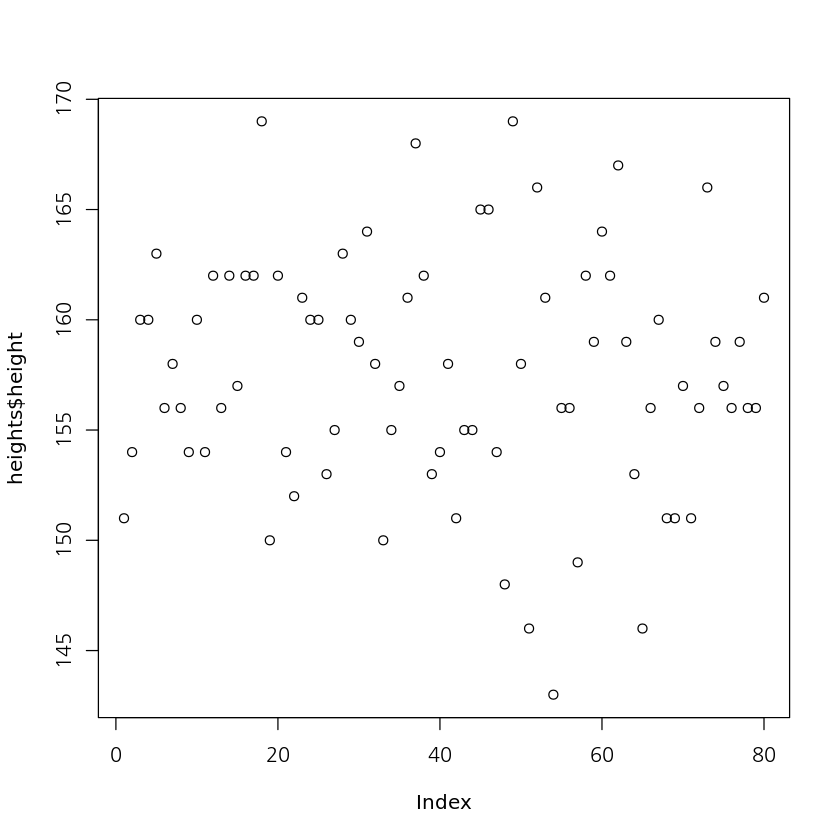

In [5]:
plot(heights$height)

In [6]:
sqrt(sum((heights$height - (sum(heights$height) /length(heights$height)))^2) / (length(heights$height) -1))

[1] 5.404581

In [7]:
sd(heights$height)

[1] 5.404581

### 히스토그램을 그리는 방법
* 도수분포표 작성
    + 최대/최소값
    + class 설정 - **구간**
    + **계급값** 설정
    + 계급내 데이터수 파악 - **빈도/도수frequency**
    + 각 계급 빈도의 상대비율 - **상대도수**
    + 각 계급의 누적합 - **누적도수**
* 히스토그램을 통해 데이터의 분포(어떻게 모여 있는지) 파악 가능


### 범위 파악 : xlm

In [8]:
height <- heights$height
mx <- max(height)
mn <- min(height)
range <- mx - mn

In [9]:
sprintf('%d %d %d', mx, mn, range)

[1] "169 143 26"

#### 구간범위 : 140 ~ 170, 5 혹은 10단위로 끊음

### 구간 break 설정

In [10]:
bmin = as.integer(mn / 10) * 10 # 구간 최소값
bmin

[1] 140

In [11]:
bmax = as.integer(mx / 10) * 10 + 10
bmax

[1] 170

In [12]:
sprintf('%d %d', bmax, bmin)

[1] "170 140"

#### 계급값 설정 - 구간 기준값

In [13]:
bins = seq(140, 170, 5)
bins  # 140 145 150 155 160 165 170
mid = (bins[2] - bins[1])/2
mdbins = bins + mid
mdbins

[1] 140 145 150 155 160 165 170

[1] 142.5 147.5 152.5 157.5 162.5 167.5 172.5

#### 구간내 빈도계산

$breaks
[1] 140 145 150 155 160 165 170

$counts
[1]  1  6 19 30 18  6

$density
[1] 0.0025 0.0150 0.0475 0.0750 0.0450 0.0150

$mids
[1] 142.5 147.5 152.5 157.5 162.5 167.5

$xname
[1] "height"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

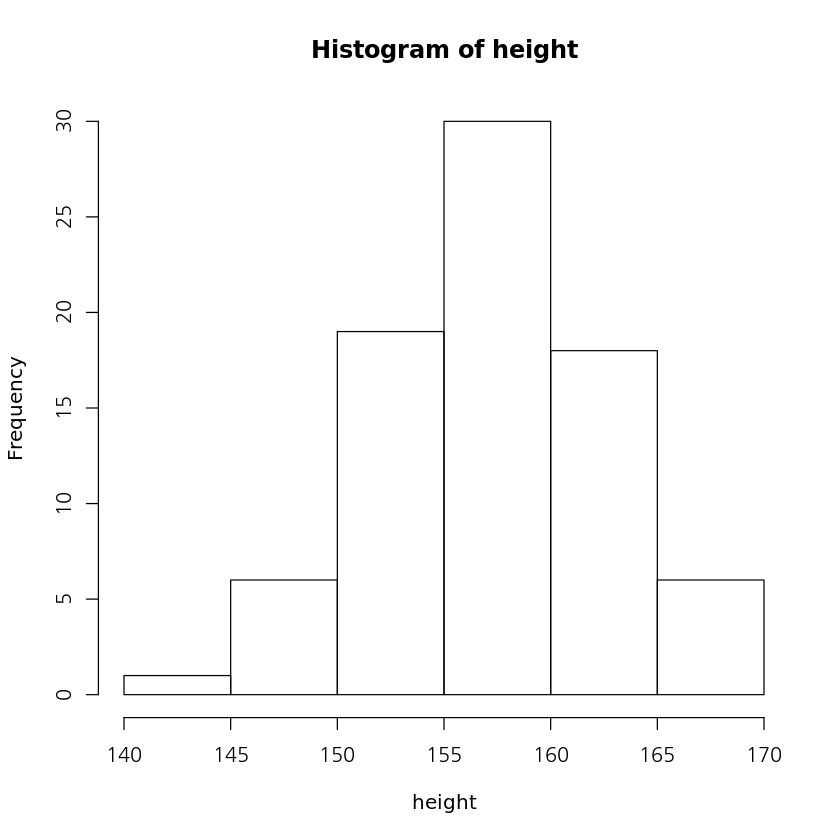

In [14]:
h <- hist(height, breaks=bins)
h

In [15]:
h$counts # 빈도수

[1]  1  6 19 30 18  6

### 상대도수 = 구간별 빈도 / 전체 빈도수

In [16]:
total = length(height) # 전체빈도수 = 전체수

In [17]:
relfrq = h$counts/total
relfrq

[1] 0.0125 0.0750 0.2375 0.3750 0.2250 0.0750

In [18]:
sum(relfrq) # 상대도수 총합은 1

[1] 1

### 누적도수 = 각 구간별 빈도 누적합
+ 누적합 : cumsum(객체)

In [19]:
csfrq = cumsum(h$counts)

### 계급값 시각화

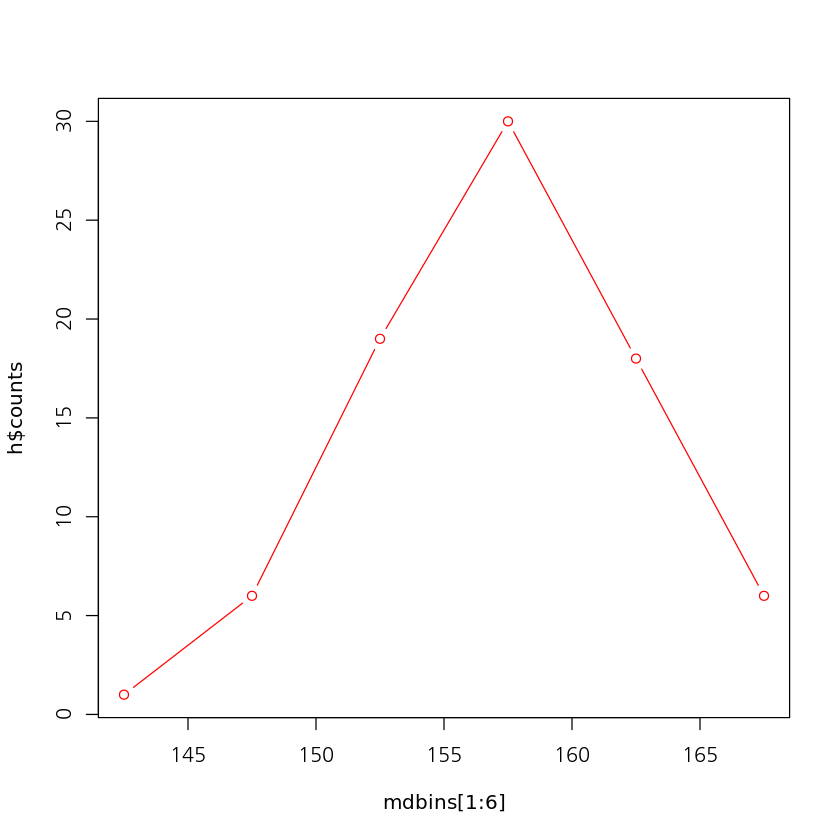

In [20]:
plot(mdbins[1:6], h$counts, type='b', col='red')

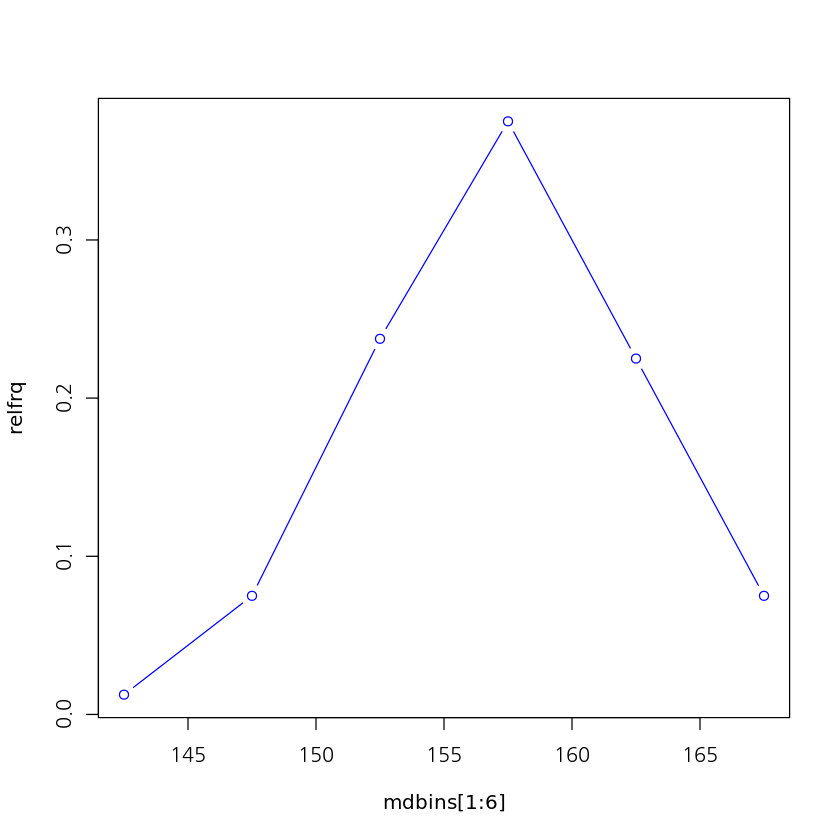

In [21]:
plot(mdbins[1:6], relfrq, type='b', col='blue')

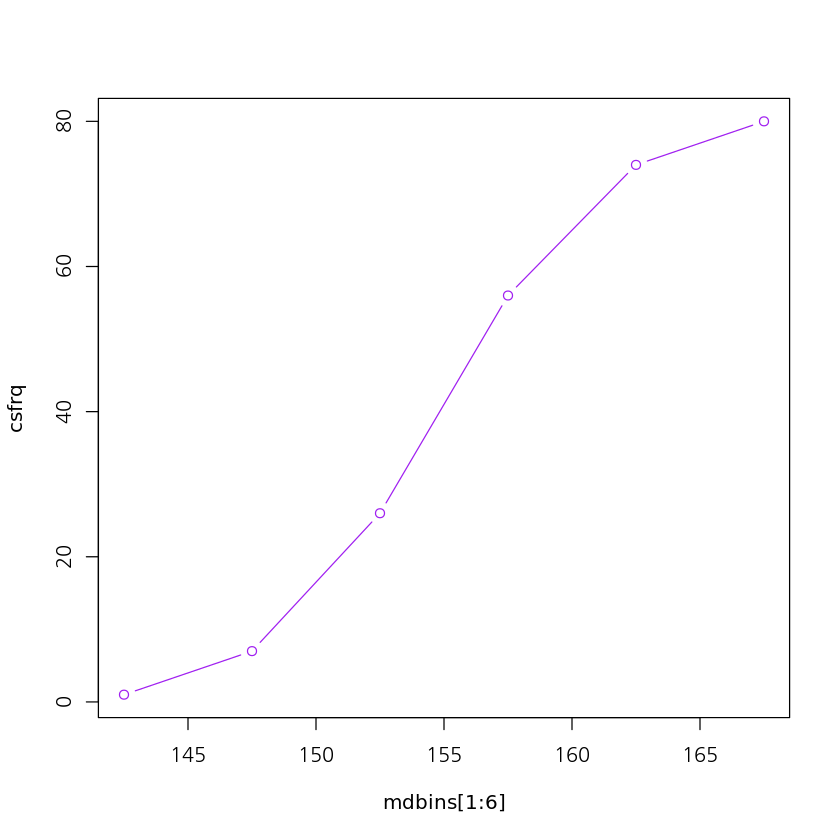

In [22]:
plot(mdbins[1:6], csfrq, type='b', col='purple')  #누적도수

### 확률밀도추정(KDE) 시각화
+ kernal density estimation
+ 관측된 데이터들의 분포로부터 원래 변수의 확률분포특성을 추정
+ 즉, 해당변수에서 관측된 몇가지 데이터로부터 변수가 가질 수 있는 모든 값들에 대한 밀도(확률)을 추정하는 것을 의미
    - 예) 수능을 위해 모의고사를 실시함
    - 모의고사를 통해 실제 수능시험 성적을 예측할 수 있음
    - 몇 회의 모의고사 성적에 대한 분포를 토대로 실제로 받을 수능시험 성적에 대한 확률을 유추해 볼 수 있음

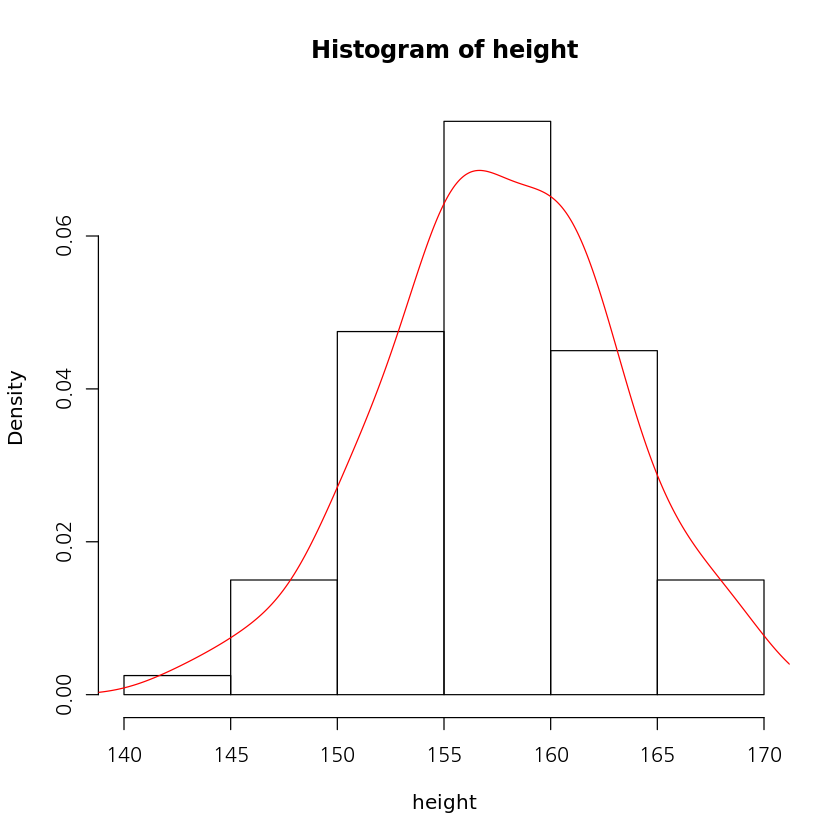

In [23]:
hist(height, freq=F) 
lines(density(height), col='red')

In [24]:
kings <- c(73,62,45,53,38,16,51,28,37,30,56,30,33,56,66,54,40,33,59,36,82,48,44,22,32,67,52)

In [25]:
max(kings)
min(kings)
range(kings)

[1] 82

[1] 16

[1] 16 82

In [26]:
kmin <- as.integer(min(kings)/10) * 10 
kmax <- as.integer(max(kings)/10) * 10 + 10
kmin
kmax

[1] 10

[1] 90

In [27]:
kbins = seq(10, 90, 10)
kbins
mid = (kbins[2] - kbins[1])/2
kmdbins = kbins + mid
kmdbins

[1] 10 20 30 40 50 60 70 80 90

[1] 15 25 35 45 55 65 75 85 95

$breaks
[1] 10 20 30 40 50 60 70 80 90

$counts
[1] 1 4 7 3 7 3 1 1

$density
[1] 0.003703704 0.014814815 0.025925926 0.011111111 0.025925926 0.011111111
[7] 0.003703704 0.003703704

$mids
[1] 15 25 35 45 55 65 75 85

$xname
[1] "kings"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

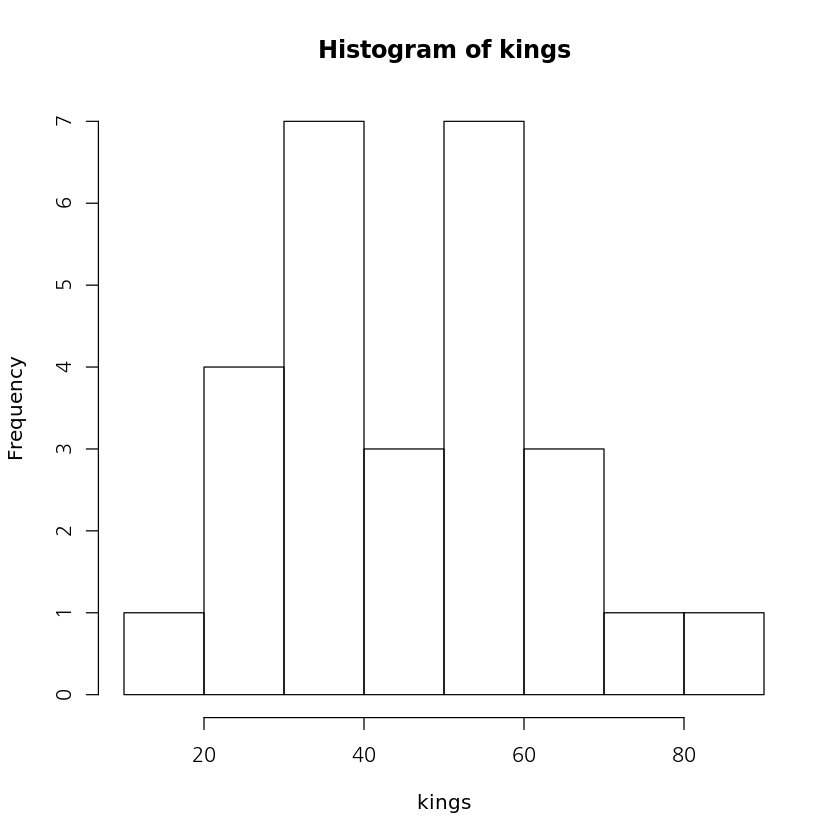

In [28]:
k <- hist(kings, breaks=kbins)
k

In [29]:
k$counts

[1] 1 4 7 3 7 3 1 1

In [30]:
ktotal = sum(k$counts)
ktotal

[1] 27

In [31]:
krelfrq = k$counts/ktotal
krelfrq

[1] 0.03703704 0.14814815 0.25925926 0.11111111 0.25925926 0.11111111 0.03703704
[8] 0.03703704

In [32]:
sum(krelfrq)

[1] 1

In [33]:
kcsfrq = cumsum(k$counts)
kcsfrq

[1]  1  5 12 15 22 25 26 27

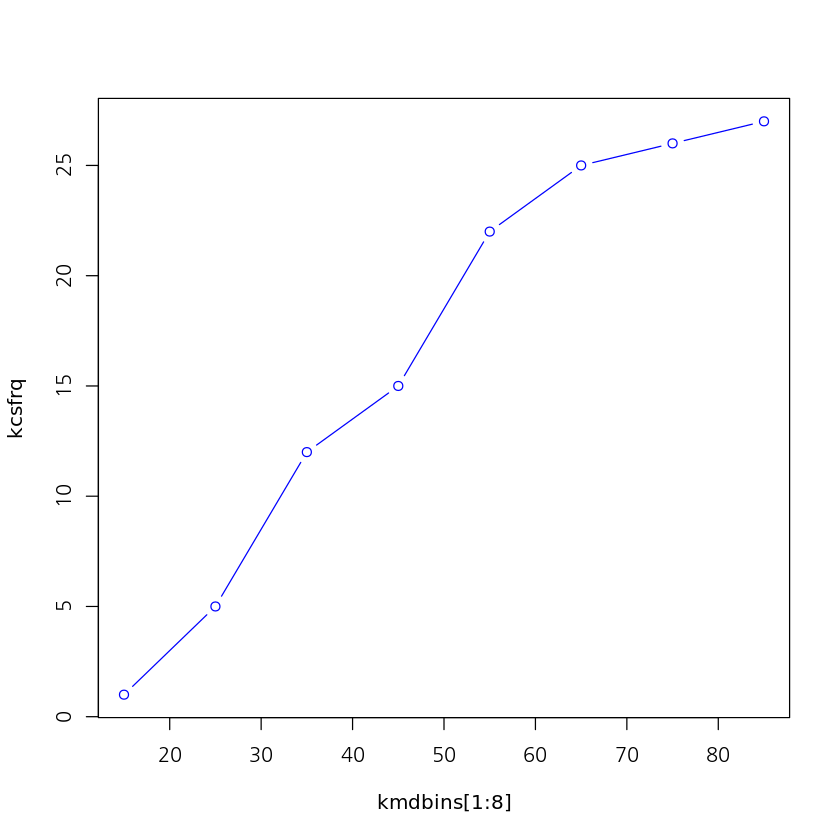

In [34]:
plot(kmdbins[1:8], kcsfrq, col='blue', type='b')

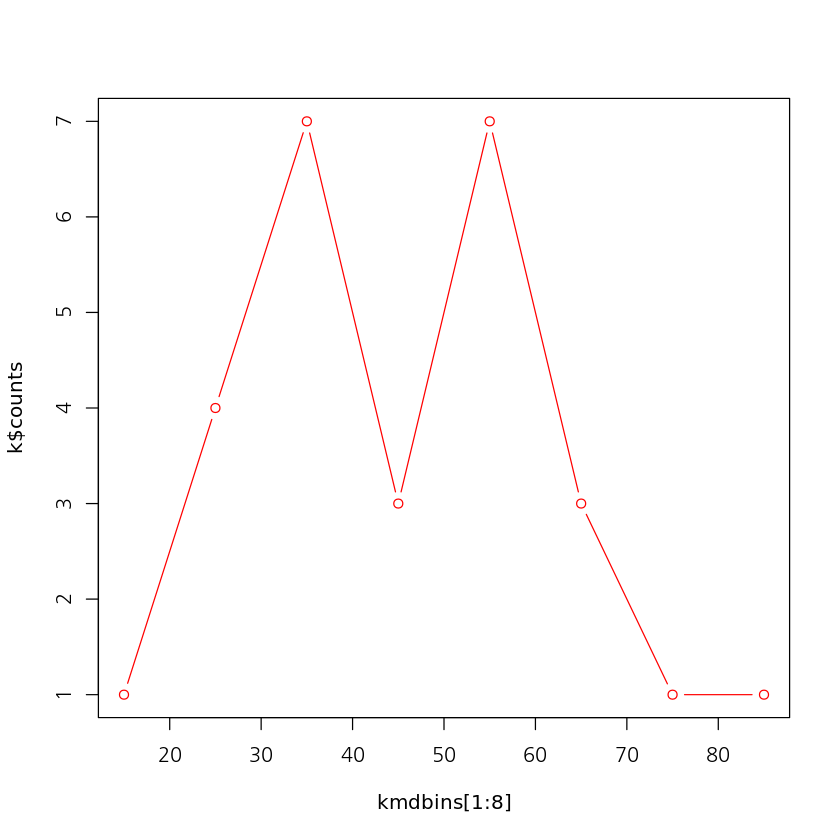

In [35]:
plot(kmdbins[1:8], k$counts, col='red', type='b')

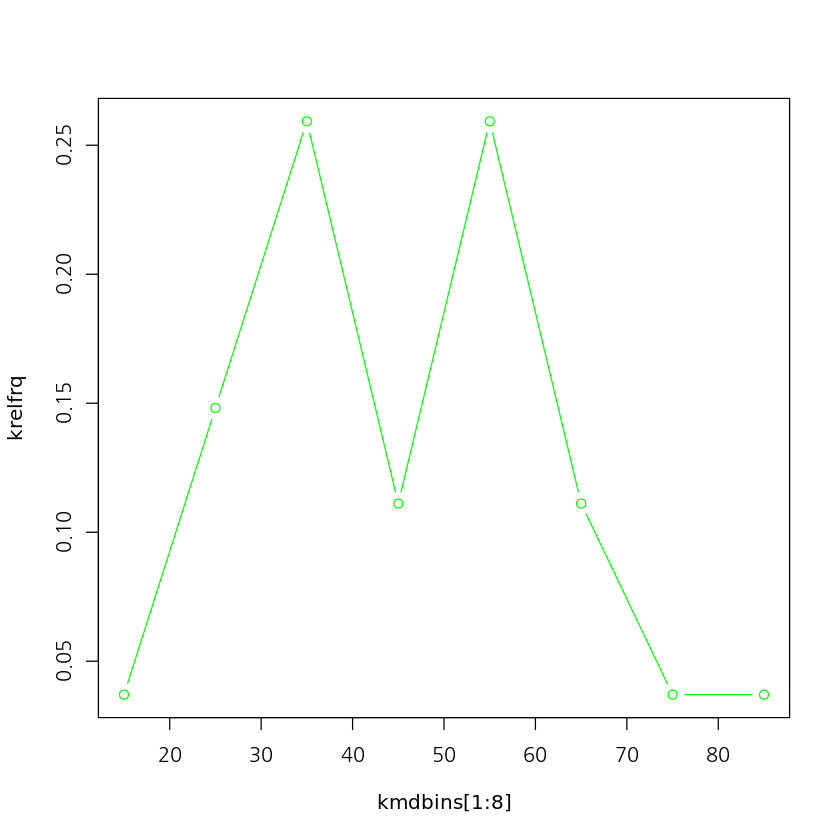

In [36]:
plot(kmdbins[1:8], krelfrq, col='green', type='b')

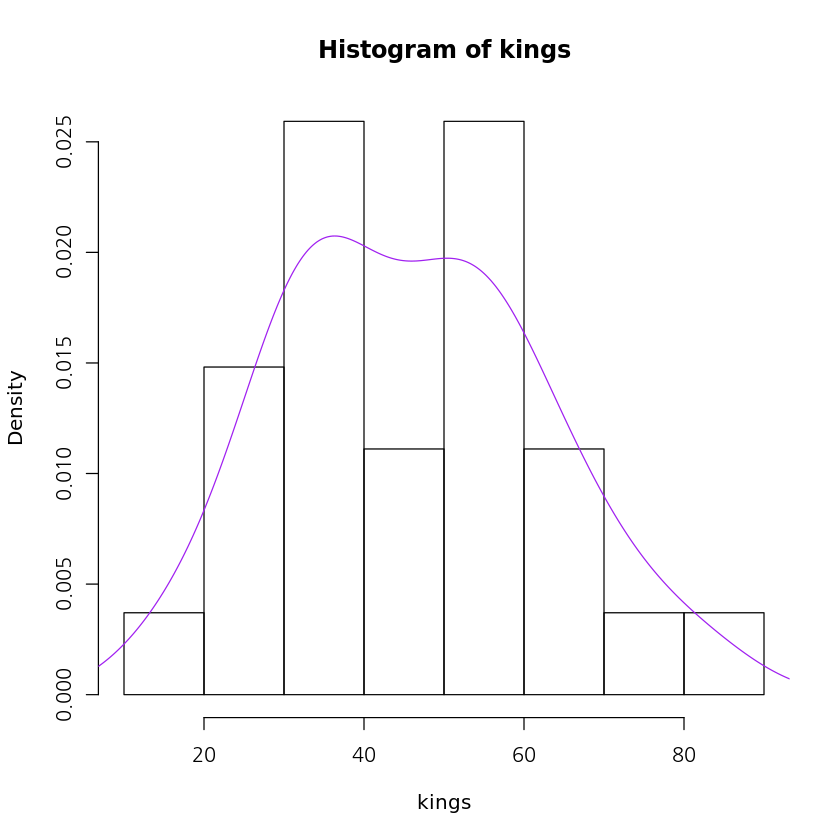

In [37]:
hist(kings, freq=F)
lines(density(kings), col='purple')

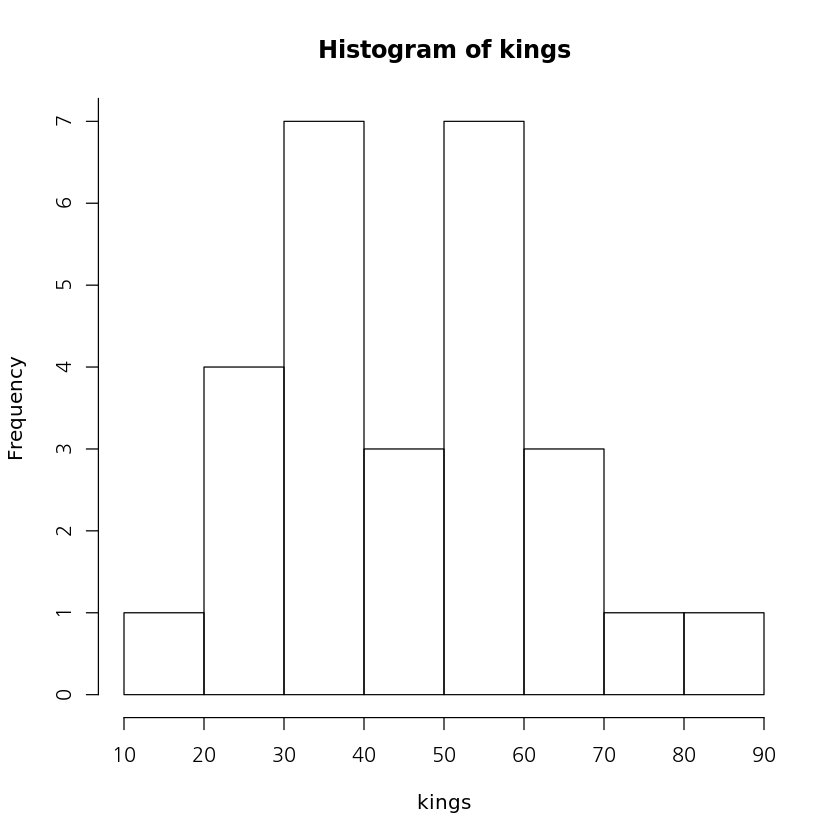

In [38]:
hist(kings, axes=F)
axis(side=1, at=seq(10,90,10))
axis(side=2, at=seq(0,10))

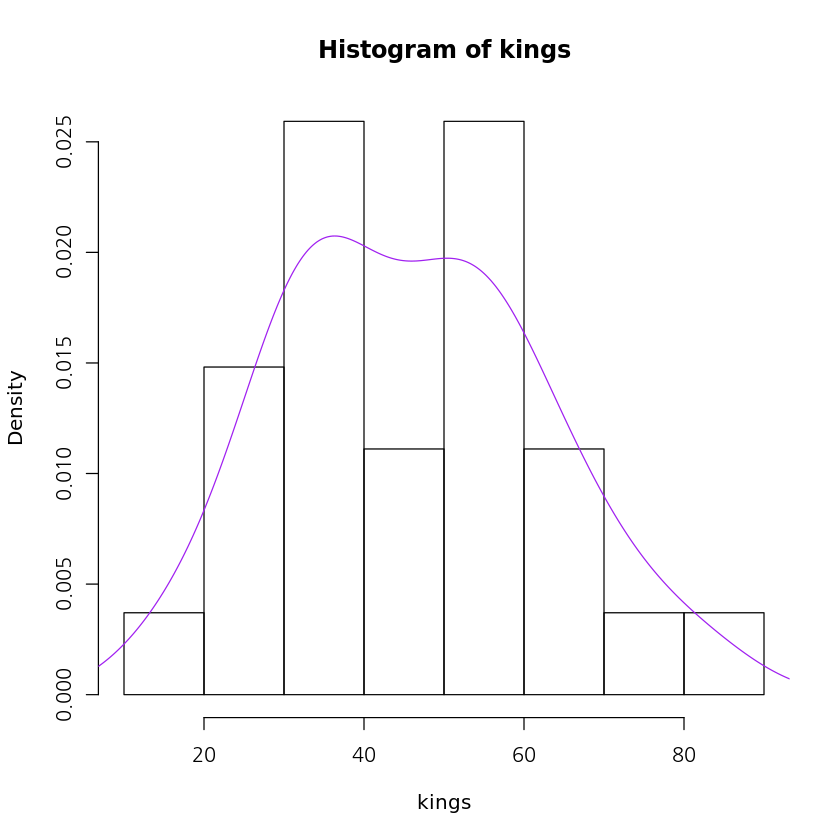

In [39]:
hist(kings, probability=T)
lines(density(kings), col='purple')

In [40]:
phone <- c(10,37,22,32,18,15,15,18,22,15,20,25,38,28,25,30,20,22,18,22,22,12,22,26,22,32,22,23,20,23,23,20,25,51,20,25,26,22,26,28,28,20,23,30,12,22,35,11,20,25)

In [41]:
max(phone)
min(phone)
range(min(phone), max(phone))
pmax <- as.integer(max(phone) /10) *10 +10
pmin <- as.integer(min(phone) /10) *10
pmax
pmin
length(unique(phone))

[1] 51

[1] 10

[1] 10 51

[1] 60

[1] 10

[1] 17

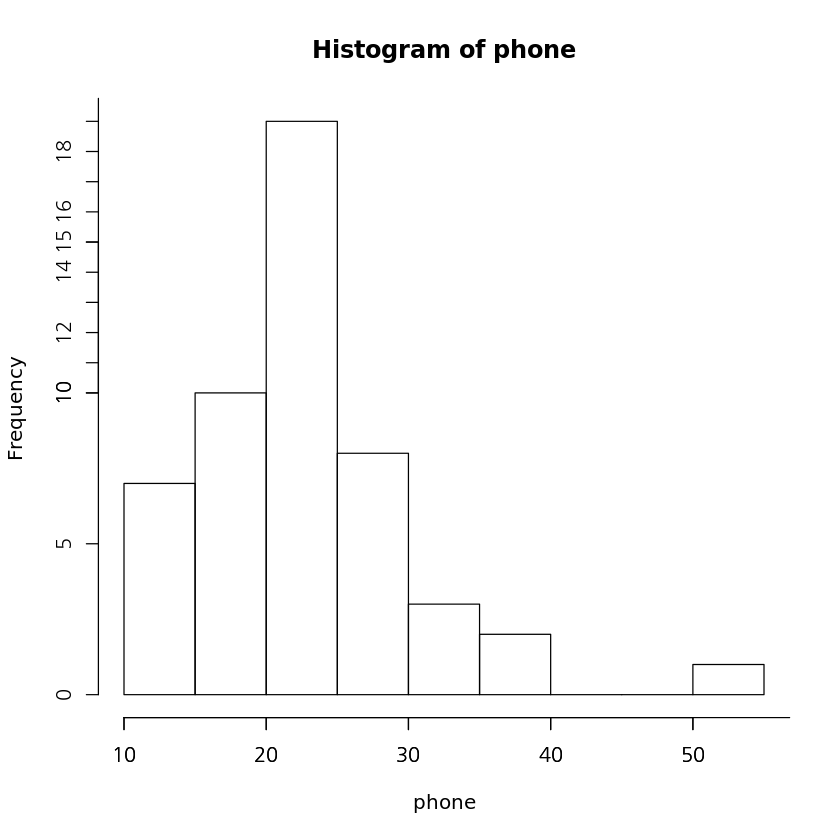

In [42]:
hist(phone)
axis(side=1, at=seq(10, 60, 10))
axis(side=2, at=seq(10,20))

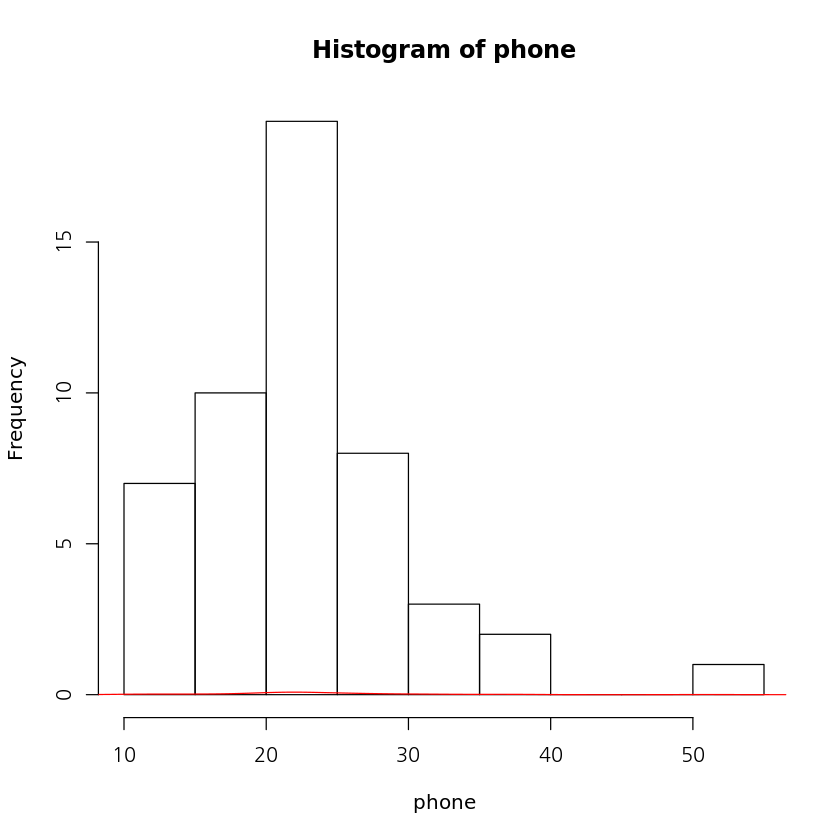

In [43]:
hist(phone)
lines(density(phone), col='red')

#### 히스토그램 다루기
+ hist(대상, 구간정보, 옵션)

In [44]:
heights <- c(170, 165, 182, 156, 142, 165, 159, 147, 175, 172)

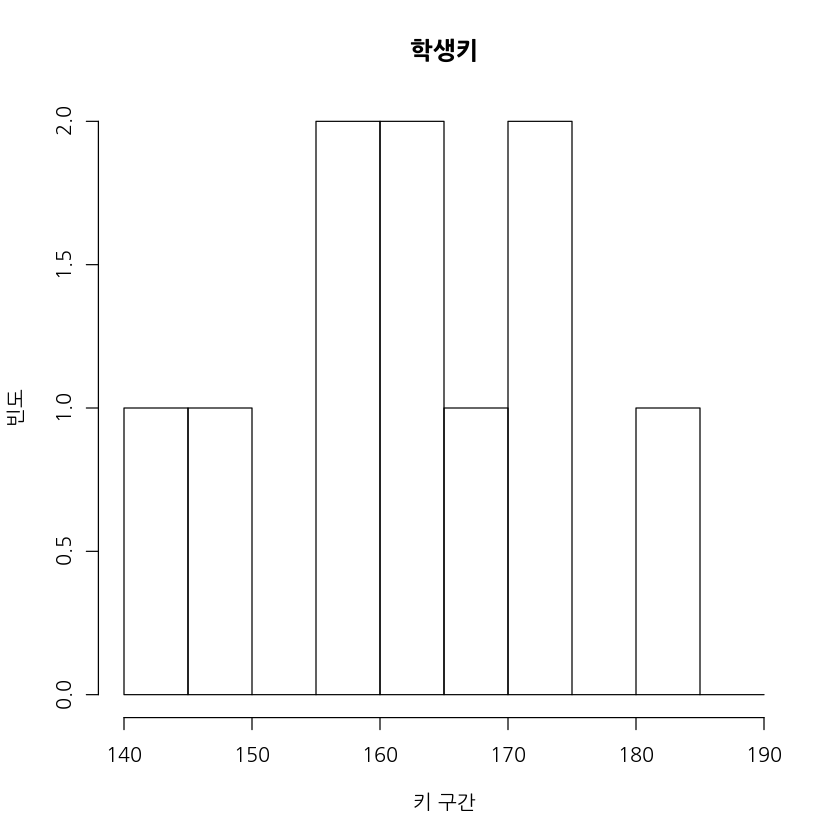

In [45]:
hist(heights, breaks=seq(140, 190, 5), main='학생키', xlab='키 구간', ylab='빈도')

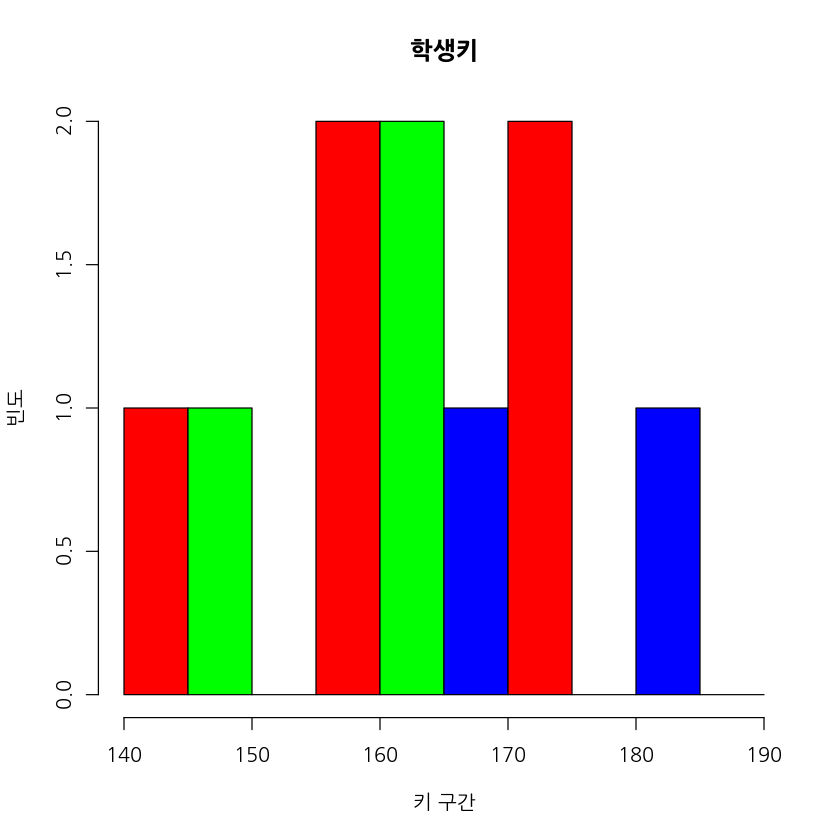

In [46]:
hist(heights, breaks=seq(140, 190, 5), main='학생키', xlab='키 구간', ylab='빈도', col=c('red', 'green', 'blue'))

### 색상지정 - colormap (matplotlib colormap)

#### R에서 제공하는 coloramp : rainbow, heat.colors
+ cm.colors,  topo.colors,  terrain.colors

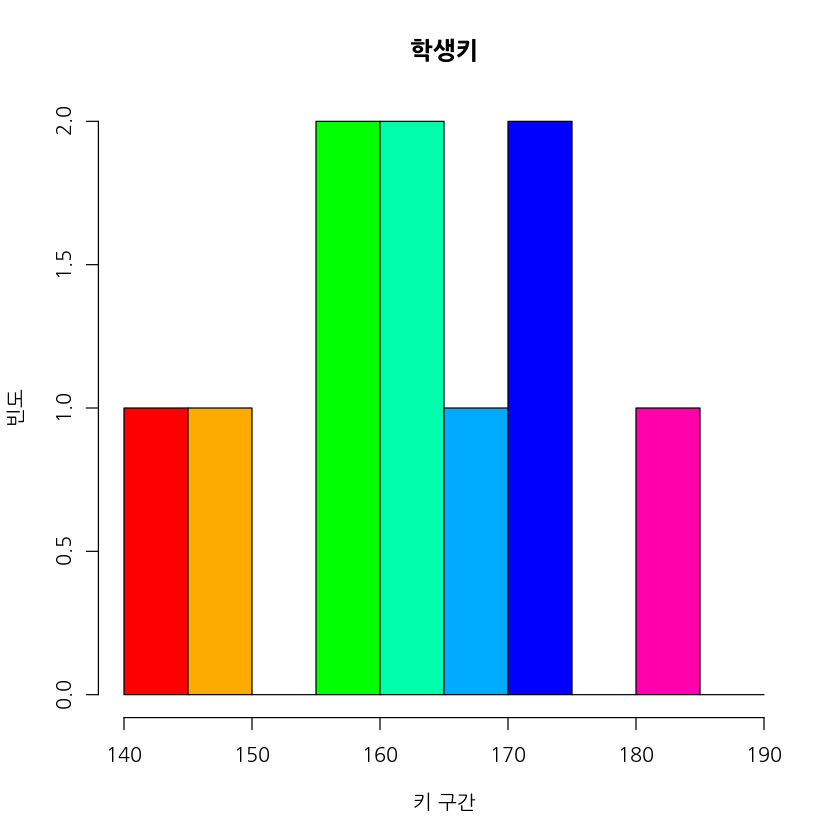

In [47]:
hist(heights, breaks=seq(140, 190, 5), main='학생키', xlab='키 구간', ylab='빈도', col=rainbow((9)))

### 히스토그램에 빈도수 나타내기

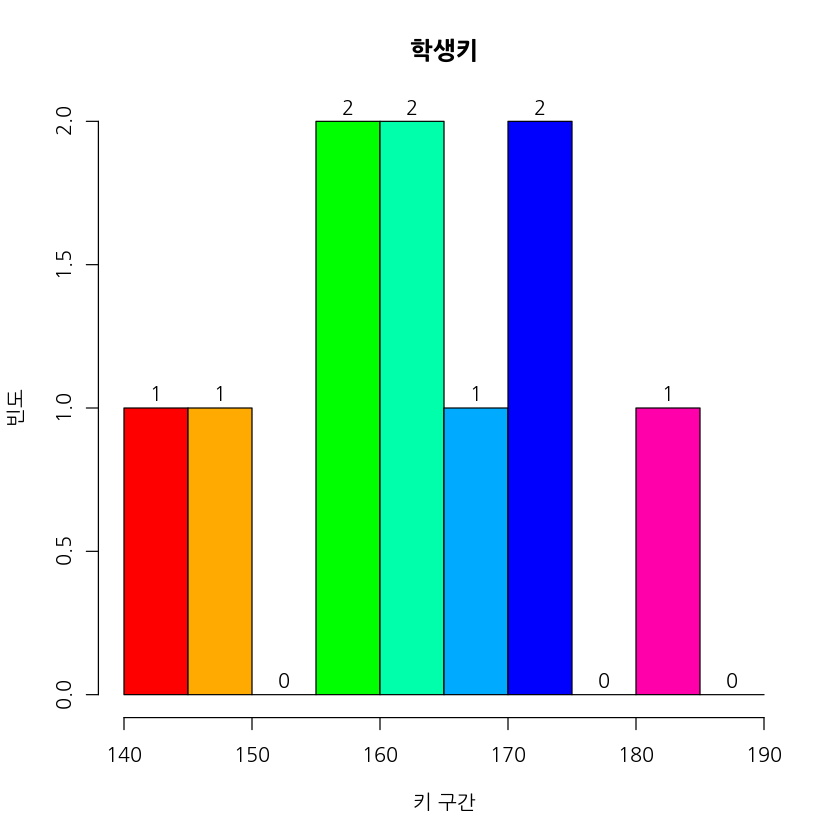

In [48]:
h1 <- hist(heights, breaks=seq(140, 190, 5), main='학생키', xlab='키 구간', ylab='빈도', col=rainbow((9)))
text(h1$mids, h1$counts+0.05, lab=h1$counts)

## 타이타닉 탑승객의 나이 분포 시각화

In [49]:
titan = read.csv('titanic.csv')

In [50]:
head(titan)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,life,seat,port
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,live,1st,southampthon
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,live,1st,southampthon
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,dead,1st,southampthon
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,dead,1st,southampthon
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,dead,1st,southampthon
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,live,1st,southampthon


In [51]:
str(titan)

'data.frame':	1306 obs. of  13 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1304 levels "Abbing, Mr. Anthony",..: 22 24 25 26 27 31 46 47 51 55 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 927 levels "110152","110413",..: 187 49 49 49 49 124 92 16 76 824 ...
 $ fare    : num  211 152 152 152 152 ...
 $ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 3 3 1 ...
 $ life    : Factor w/ 2 levels "dead","live": 2 2 1 1 1 2 2 1 2 1 ...
 $ seat    : Factor w/ 3 levels "1st","2nd","3rd": 1 1 1 1 1 1 1 1 1 1 ...
 $ port    : Factor w/ 3 levels "cherbourg","qeenstown",..: 3 3 3 3 3 3 3 3 3 1 ...


In [52]:
summary(titan)

     pclass         survived                                    name     
 Min.   :1.000   Min.   :0.0000   Connolly, Miss. Kate            :   2  
 1st Qu.:2.000   1st Qu.:0.0000   Kelly, Mr. James                :   2  
 Median :3.000   Median :0.0000   Abbing, Mr. Anthony             :   1  
 Mean   :2.296   Mean   :0.3813   Abbott, Master. Eugene Joseph   :   1  
 3rd Qu.:3.000   3rd Qu.:1.0000   Abbott, Mr. Rossmore Edward     :   1  
 Max.   :3.000   Max.   :1.0000   Abbott, Mrs. Stanton (Rosa Hunt):   1  
                                  (Other)                         :1298  
     sex           age              sibsp         parch             ticket    
 female:464   Min.   : 0.1667   Min.   :0.0   Min.   :0.0000   CA. 2343:  11  
 male  :842   1st Qu.:22.0000   1st Qu.:0.0   1st Qu.:0.0000   1601    :   8  
              Median :29.8811   Median :0.0   Median :0.0000   CA 2144 :   8  
              Mean   :29.8269   Mean   :0.5   Mean   :0.3859   3101295 :   7  
             

In [53]:
titan$pclass <- as.factor(titan$pclass)

In [54]:
titan$survived <- as.factor(titan$survived)

In [55]:
titan$name <- as.character(titan$name)

In [56]:
titan$ticket <- as.character(titan$ticket)

In [57]:
str(titan)

'data.frame':	1306 obs. of  13 variables:
 $ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 1 2 1 ...
 $ name    : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : chr  "24160" "113781" "113781" "113781" ...
 $ fare    : num  211 152 152 152 152 ...
 $ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 3 3 1 ...
 $ life    : Factor w/ 2 levels "dead","live": 2 2 1 1 1 2 2 1 2 1 ...
 $ seat    : Factor w/ 3 levels "1st","2nd","3rd": 1 1 1 1 1 1 1 1 1 1 ...
 $ port    : Factor w/ 3 levels "cherbourg","qeenstown",..: 3 3 3 3 3 3 3 3 3 1 ...


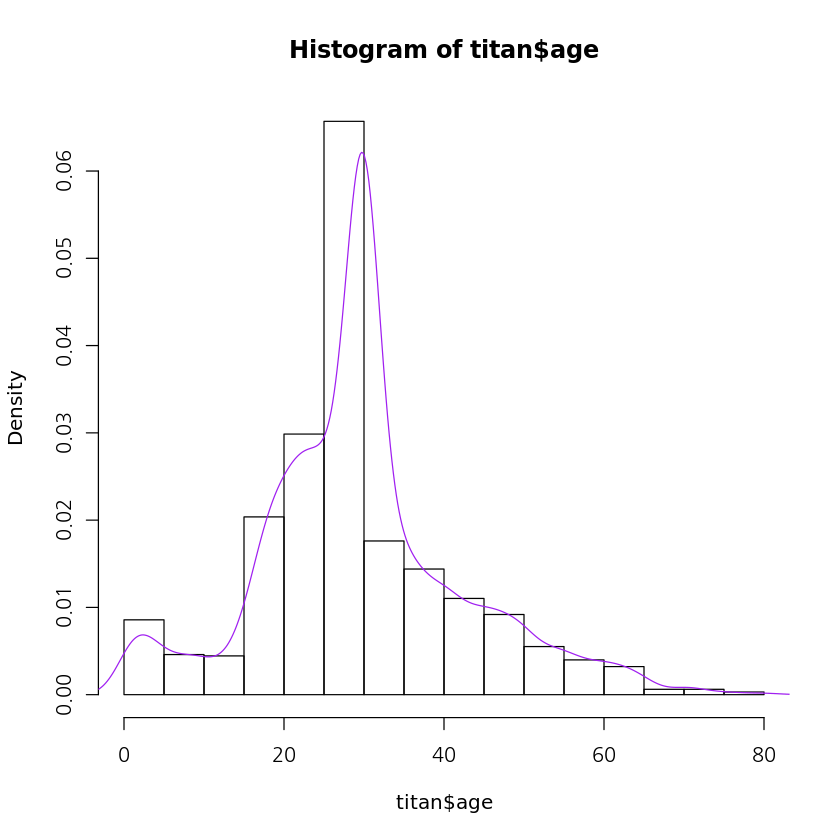

In [58]:
hist(titan$age, probability=T)
lines(density(titan$age), col='purple')

In [59]:
min(titan$age)
max(titan$age)
range(titan$age)
max(titan$age) - min(titan$age)

[1] 0.1667

[1] 80

[1]  0.1667 80.0000

[1] 79.8333

In [60]:
tbins = seq(15, 85, 10)
tbins
tmid = (tbins[2] - tbins[1])/2
tmdbins = tbins + tmid
tmdbins

[1] 15 25 35 45 55 65 75 85

[1] 20 30 40 50 60 70 80 90

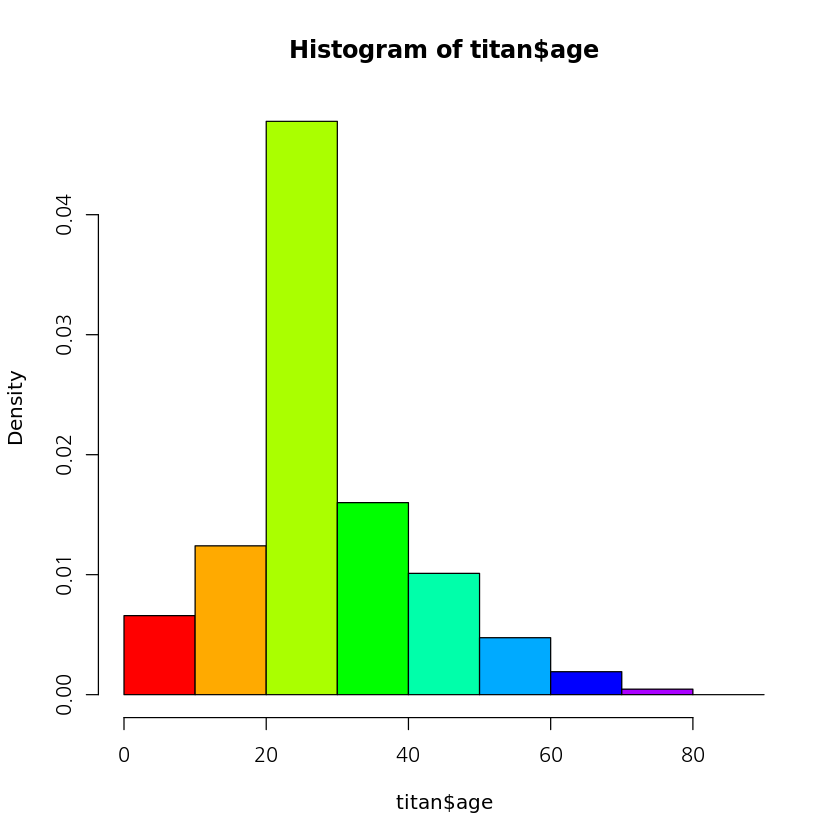

In [61]:
hist(titan$age, probability=T, breaks=seq(0, 90, 10), col=rainbow((9)))

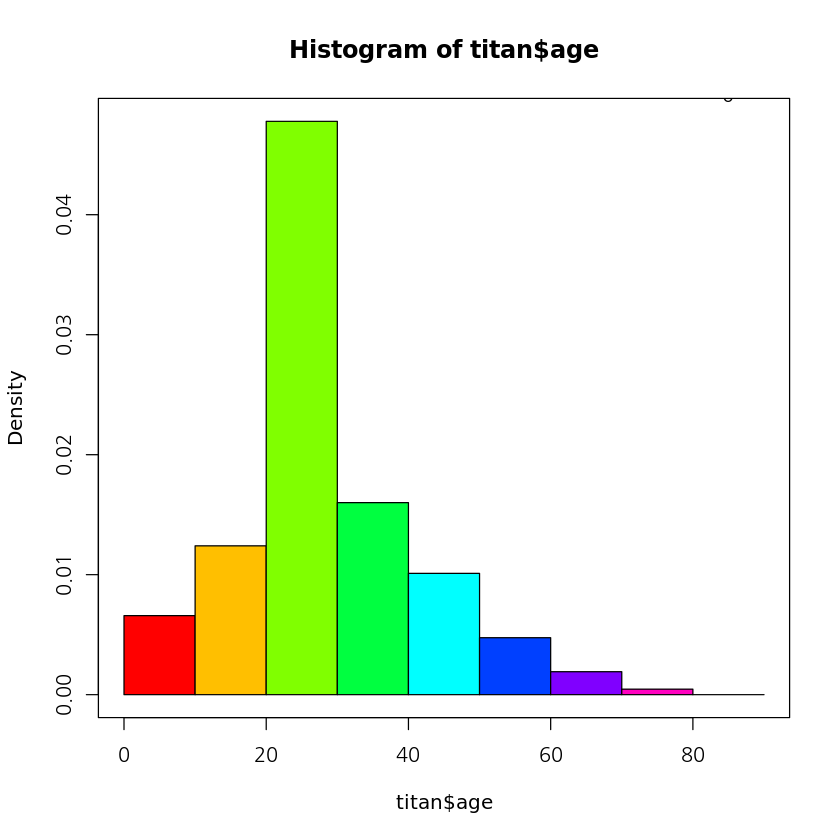

In [62]:
t1 <- hist(titan$age, probability=T, breaks=seq(0, 90, 10), col=rainbow(8))
text(t1$mids, t1$counts+0.05, lab=t1$counts)
box()

### 히스토그램 구간 수 계산

In [63]:
cuts = length(seq(0, 80, 5))
cuts

[1] 17

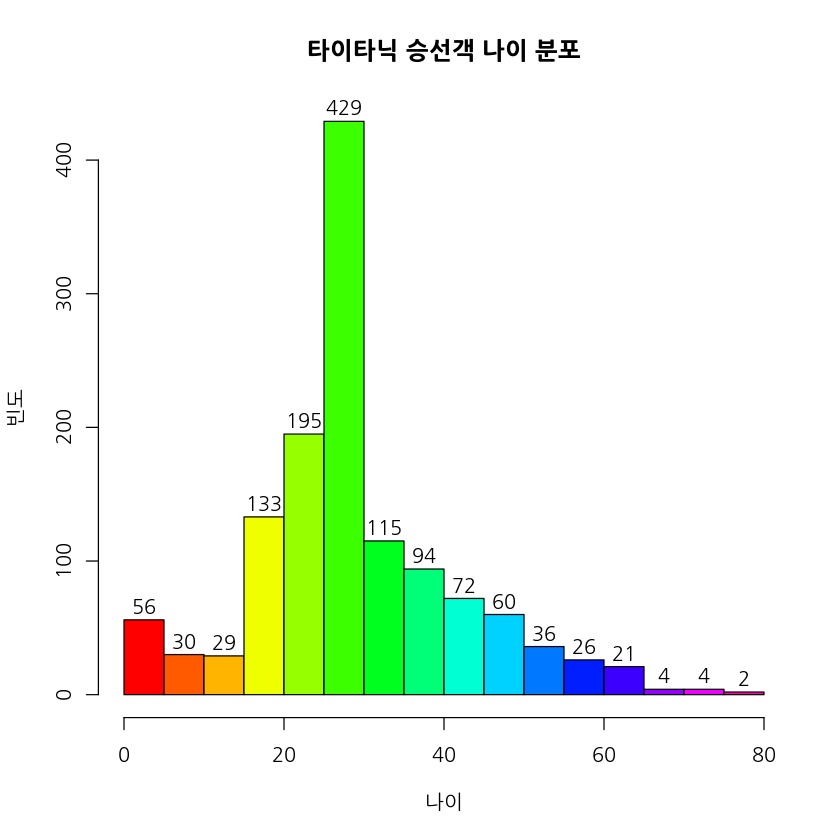

In [64]:
t <- hist(titan$age, main='타이타닉 승선객 나이 분포', xlab='나이', ylab='빈도', col=rainbow(17))
text(t$mids, t$counts+10, lab=t$counts)

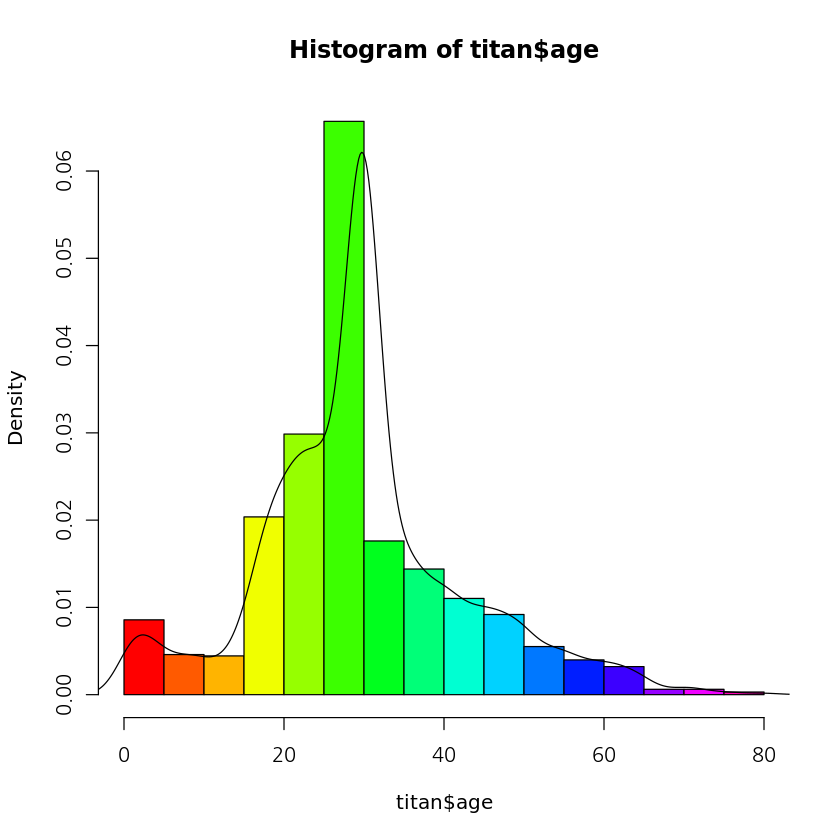

In [65]:
hist(titan$age, probability=T, col=rainbow(17))
lines(density(titan$age), col='black')

### ggplot 패키지 설치

In [66]:
library(ggplot2)

### tips 데이터셋
+ seabron 내장 데이터셋
+ 손님들의 성별, 흡연여부, 요일별, 시간별, 손님수별 식사시간과 팁에 관련된 데이터

In [67]:
tips <- read.csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [68]:
str(tips)

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : int  2 3 3 2 4 4 2 4 2 2 ...


In [69]:
summary(tips)

   total_bill         tip             sex      smoker      day         time    
 Min.   : 3.07   Min.   : 1.000   Female: 87   No :151   Fri :19   Dinner:176  
 1st Qu.:13.35   1st Qu.: 2.000   Male  :157   Yes: 93   Sat :87   Lunch : 68  
 Median :17.80   Median : 2.900                          Sun :76               
 Mean   :19.79   Mean   : 2.998                          Thur:62               
 3rd Qu.:24.13   3rd Qu.: 3.562                                                
 Max.   :50.81   Max.   :10.000                                                
      size     
 Min.   :1.00  
 1st Qu.:2.00  
 Median :2.00  
 Mean   :2.57  
 3rd Qu.:3.00  
 Max.   :6.00  

#### 식사규모 siz를 범주형으로 변환

In [70]:
tips$size <- as.factor(tips$size)

In [71]:
str(tips)

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : Factor w/ 6 levels "1","2","3","4",..: 2 3 3 2 4 4 2 4 2 2 ...


In [72]:
head(tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


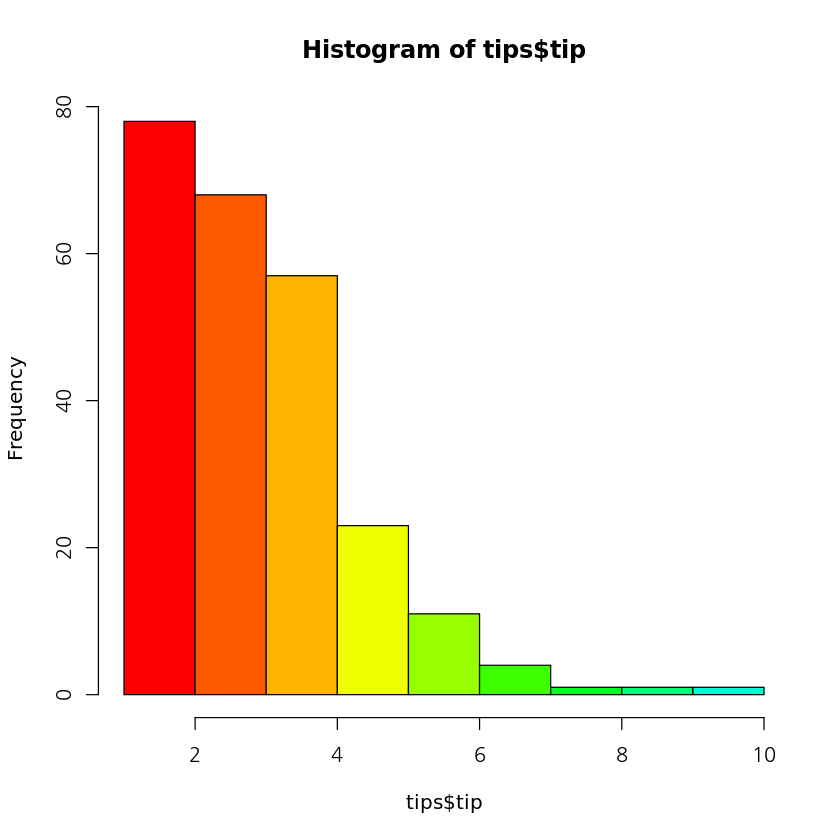

In [73]:
hist(tips$tip, col=rainbow(17))

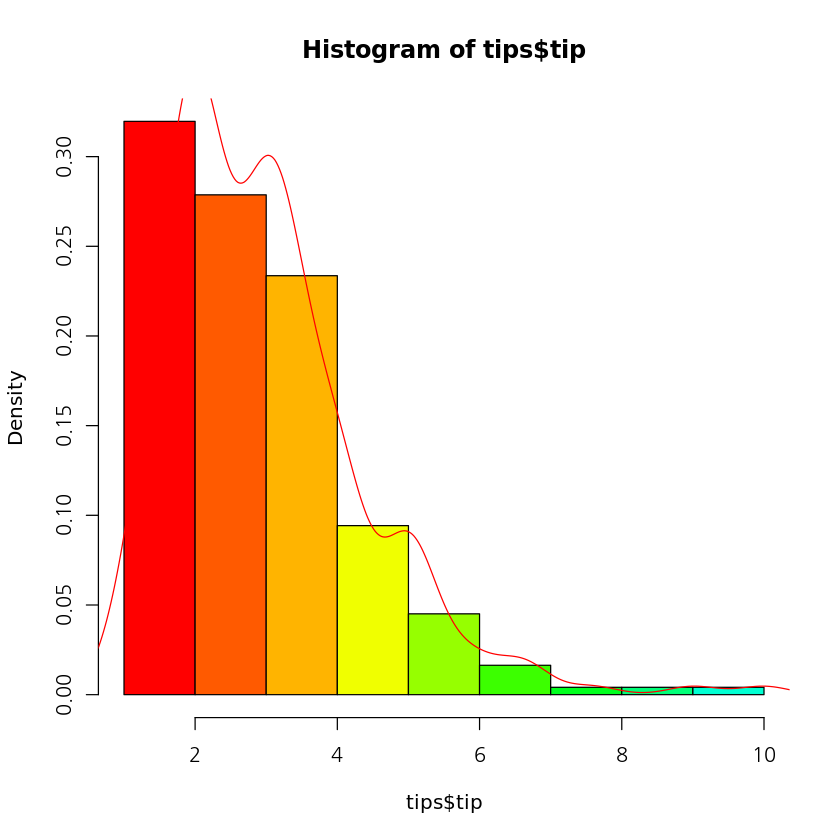

In [74]:
hist(tips$tip, probability=T, col=rainbow(17))
lines(density(tips$tip), col='red')

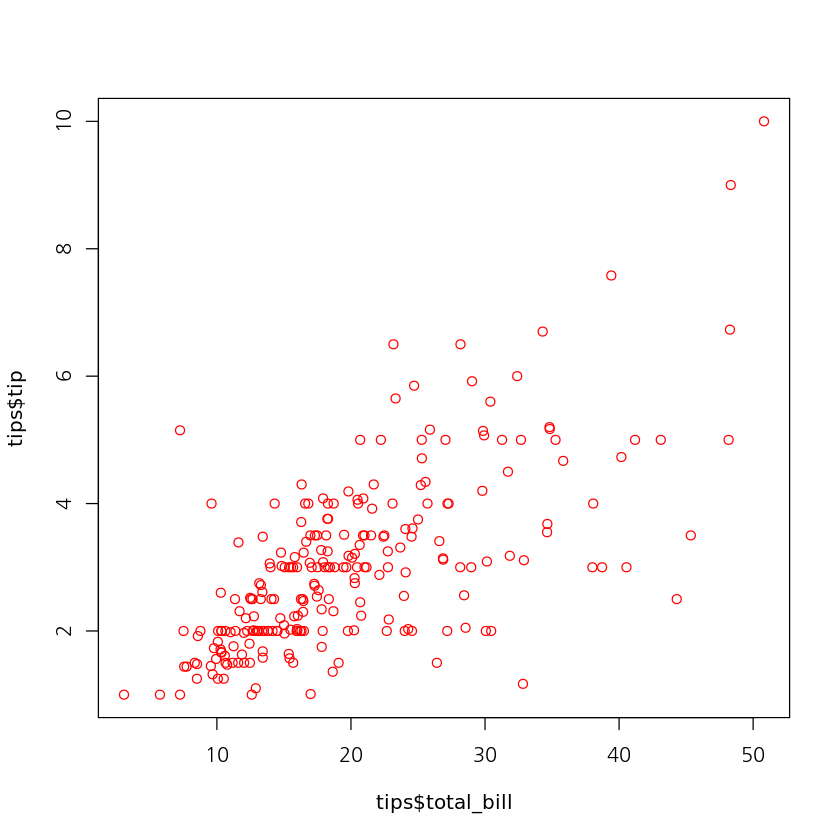

In [75]:
plot(tips$total_bill, tips$tip, col='red')

In [76]:
gender <- as.integer(tips$sex)

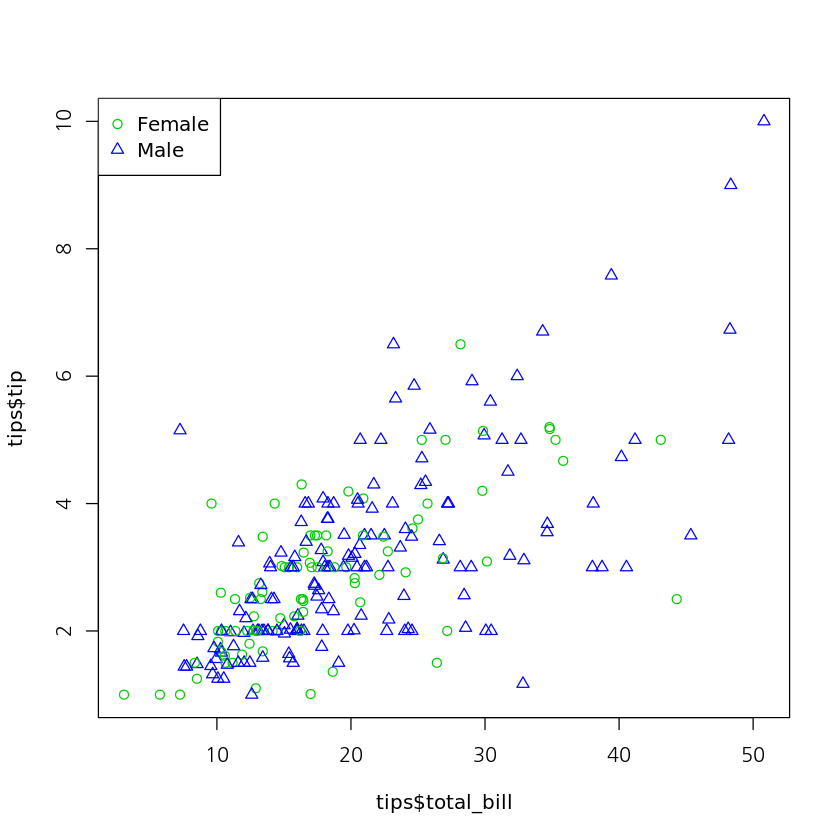

In [77]:
plot(tips$total_bill, tips$tip, pch=gender, col=gender+2)
legend('topleft', levels(tips$sex), pch=unique(gender), col=unique(gender+2))

In [78]:
smoker <- as.integer(tips$smoker)

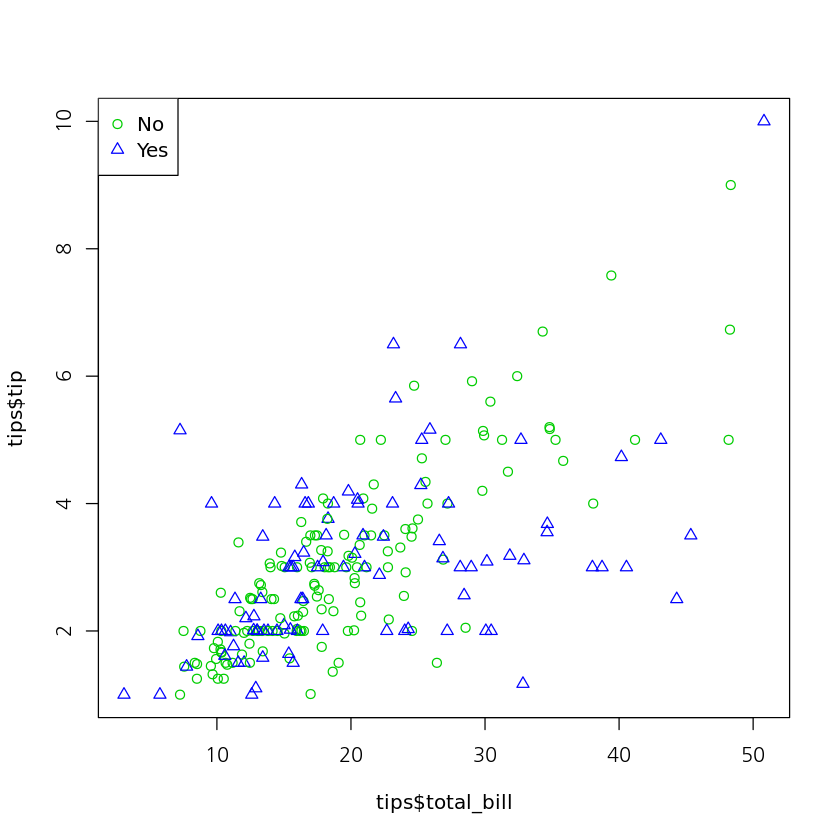

In [79]:
plot(tips$total_bill, tips$tip, pch=smoker, col=smoker+2)
legend('topleft', levels(tips$smoker), pch=unique(smoker), col=unique(smoker+2))

In [80]:
day <- as.integer(tips$day)

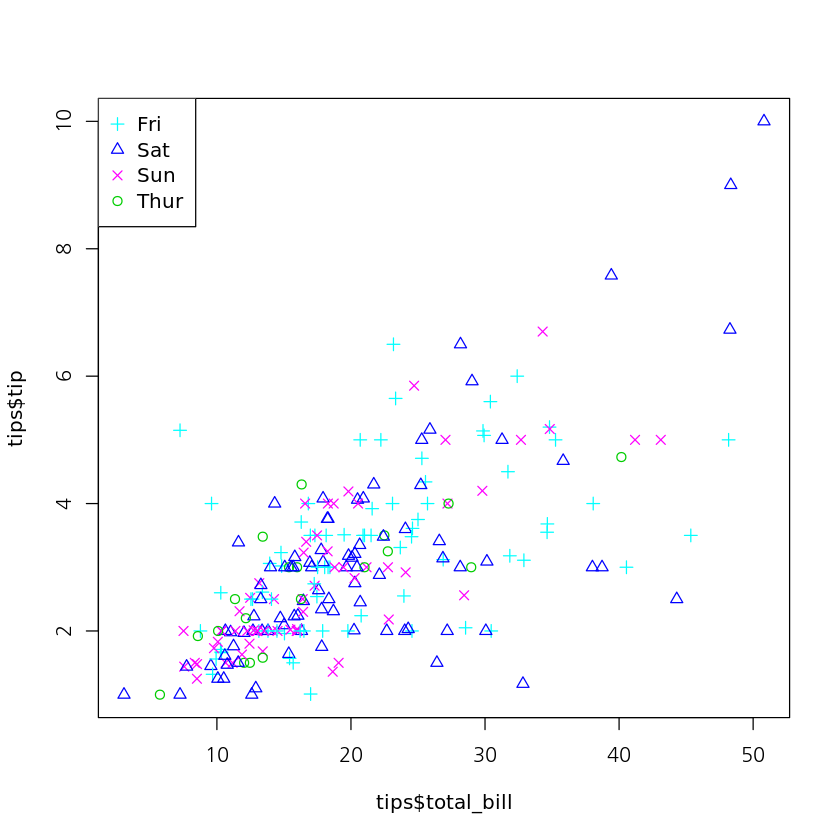

In [81]:
plot(tips$total_bill, tips$tip, pch=day, col=day+2)
legend('topleft', levels(tips$day), pch=unique(day), col=unique(day+2))

In [82]:
time <- as.integer(tips$time)

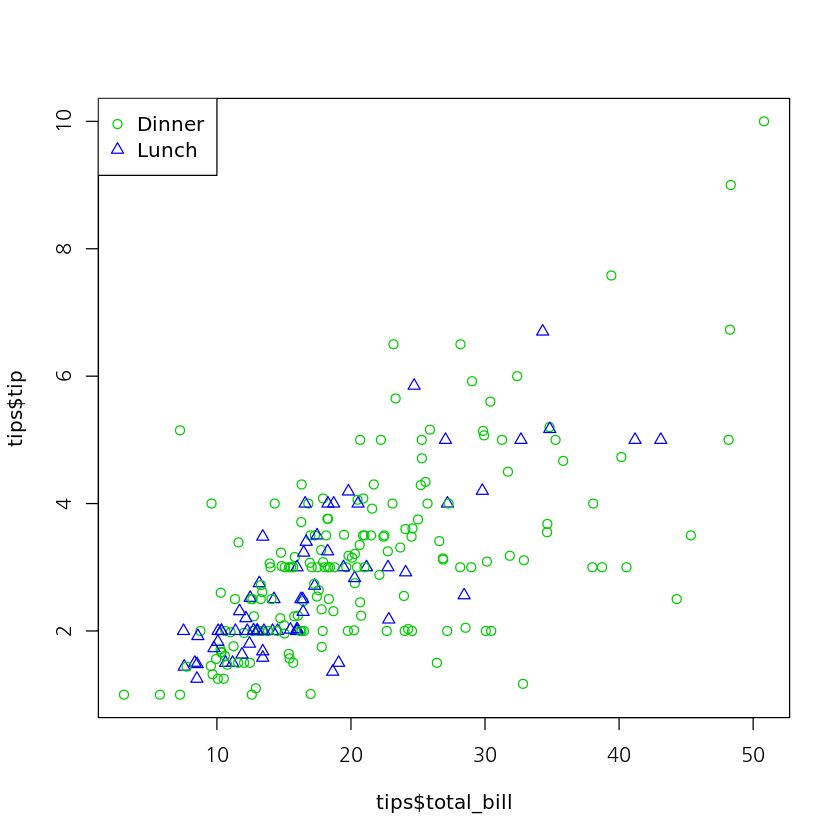

In [83]:
plot(tips$total_bill, tips$tip, pch=time, col=time+2)
legend('topleft', levels(tips$time), pch=unique(time), col=unique(time+2))

In [84]:
size <- as.integer(tips$size)

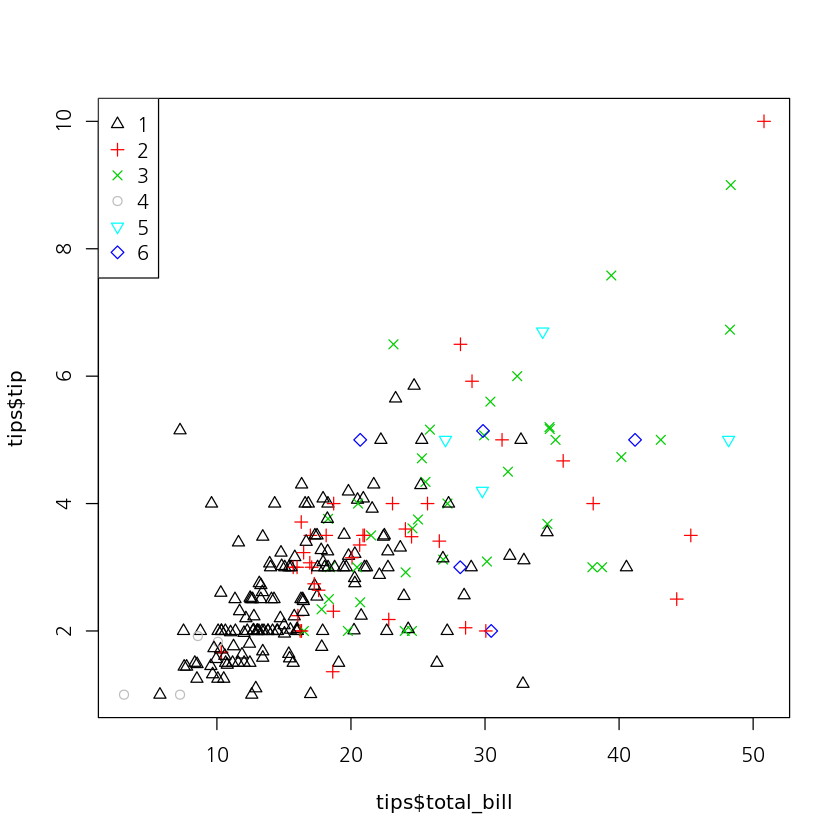

In [85]:
plot(tips$total_bill, tips$tip, pch=size, col=size+7)
legend('topleft', levels(tips$size), pch=unique(size), col=unique(size+7))

### 작업한 데이터 저장하기
+ R에서 만든 객체(벡터, 데이터프레임)들은 메모리 내부에 생성
+ 프로그램이 종료하면 메모리 내부 객체들은 사라짐
+ 메모리 내 생성된 객체를 파일형태로 저장할 필요성 - 직렬화
+ 파일저장 : save(객체명, 저장경로)
+ 파일읽기 : load(파일경로)

In [86]:
heights

[1] 170 165 182 156 142 165 159 147 175 172

In [89]:
save(heights, file='heights.rdata')

In [90]:
ls()  #메모리내에 생성된 객체 확인

[1] "bins"    "bmax"    "bmin"    "csfrq"   "cuts"    "day"     "gender" 
 [8] "h"       "h1"      "height"  "heights" "k"       "kbins"   "kcsfrq" 
[15] "kings"   "kmax"    "kmdbins" "kmin"    "krelfrq" "ktotal"  "mdbins" 
[22] "mid"     "mn"      "mx"      "phone"   "pmax"    "pmin"    "range"  
[29] "relfrq"  "size"    "smoker"  "t"       "t1"      "tbins"   "time"   
[36] "tips"    "titan"   "tmdbins" "tmid"    "total"

In [91]:
rm(heights)  #메모리 내 객체 제거

In [92]:
ls()

[1] "bins"    "bmax"    "bmin"    "csfrq"   "cuts"    "day"     "gender" 
 [8] "h"       "h1"      "height"  "k"       "kbins"   "kcsfrq"  "kings"  
[15] "kmax"    "kmdbins" "kmin"    "krelfrq" "ktotal"  "mdbins"  "mid"    
[22] "mn"      "mx"      "phone"   "pmax"    "pmin"    "range"   "relfrq" 
[29] "size"    "smoker"  "t"       "t1"      "tbins"   "time"    "tips"   
[36] "titan"   "tmdbins" "tmid"    "total"

In [94]:
load('heights.rdata') # 파일에 저장된 heights 객체를 메모리내로 불러들임

In [95]:
ls()

[1] "bins"    "bmax"    "bmin"    "csfrq"   "cuts"    "day"     "gender" 
 [8] "h"       "h1"      "height"  "heights" "k"       "kbins"   "kcsfrq" 
[15] "kings"   "kmax"    "kmdbins" "kmin"    "krelfrq" "ktotal"  "mdbins" 
[22] "mid"     "mn"      "mx"      "phone"   "pmax"    "pmin"    "range"  
[29] "relfrq"  "size"    "smoker"  "t"       "t1"      "tbins"   "time"   
[36] "tips"    "titan"   "tmdbins" "tmid"    "total"